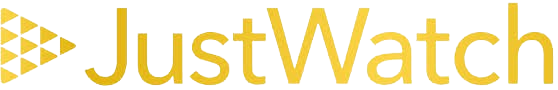

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install WordCloud

In [ ]:
#import all necessary labraries
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import openpyxl

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)

# Creating HTML file of the scrapped data so that we can often look into it.
with open('Just_watch_html.html', 'w', encoding='utf-8') as f:
    f.write(page.text)

Reading the file created and parsing HTML Doc using Beautiful Soup.

In [ ]:
# Parsing the HTML file and creating a soup of the parsed file
with open('Just_watch_html.html', 'r', encoding='utf-8') as f:
    html_doc = f.read()

soup = BeautifulSoup(html_doc, 'html.parser')

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
urls = soup.find_all("a", class_='title-list-grid__item--link')
movies_url = []
for url in urls:
    movies_url.append(f"https://www.justwatch.com{url['href']}")
movies_url

['https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/madgaon-express',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.com/in/movie/black-magic-2024',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/godzilla-minus-one',
 'https://www.justwatch.com/in/movie/kung-fu-panda-4',
 'https://www.justwatch.com/in/movie/hereditary',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/yodha-2022',
 'https://www.justwatch.com/in/movie/mad-max-fury-road',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/zara-hatke-zara-bach-ke',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.just

As we have fetched the movies URLs now we will be looking for information we need in each movie and store the data in different variables. However first let us create a sample file to look into the structure of the HTML data in with the information is stored so that we can have an idea on how to move ahead with the fetching.

In [ ]:
# Creating sample movie details file
test_url = 'https://www.justwatch.com/in/movie/laapataa-ladies'
res = requests.get(test_url)
with open('sample_html.html', "w", encoding='utf-8') as f:
    f.write(res.text)

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
# Creating an empty list to store the movie names(titles).
name_list = []

# Itirating over each URL to fetch the details from the data and parsing the info.
for url in movies_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text,"html.parser")

    # Fetching the title names, and appending them into our list.
    try:
        title_block = soup.find("div",class_="title-block")
        title = title_block.h1.text.strip()
    except Exception as e:
        title = np.nan
    name_list.append(title)



## **Scrapping release Year**

In [ ]:
# Write Your Code here
# Creating an empty list to store the release years.
release_years = []

for url in movies_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    try:
        year = soup.find("div", class_="title-block").h1
        release_year = year.find_next_sibling("span", class_="text-muted").text.strip()
        release_year = release_year.strip("()")
    except Exception as e:
        release_year = np.nan
    release_years.append(release_year)

release_years

['2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2023',
 '2015',
 '2023',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2022',
 '2011',
 '2023',
 '2019',
 '2023',
 '2024',
 '2023',
 '2021',
 '2023',
 '2024',
 '2024',
 '2024',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '2024',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '2023',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '2024',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Scrapping Genres**

In [ ]:
# Write Your Code here
genre_list = []
for url in movies_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    try:
        genre_class = soup.find("h3", class_="detail-infos__subheading", string='Genres')
        genre = genre_class.find_next_sibling('div', class_='detail-infos__value').text.strip()
    except Exception as e:
        genre = np.nan
    genre_list.append(genre)
genre_list

['Drama, Comedy',
 'Comedy, Action & Adventure',
 'Mystery & Thriller, Drama',
 'Comedy, Drama',
 'Comedy, Drama',
 'Mystery & Thriller, Horror, Drama',
 'Drama, Action & Adventure, Romance, Comedy',
 'Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Science-Fiction, Action & Adventure, Drama',
 'Comedy, Kids & Family, Fantasy, Animation, Action & Adventure',
 'Comedy, Romance',
 'Horror, Mystery & Thriller, Drama',
 'Action & Adventure, Mystery & Thriller, Drama',
 'Action & Adventure, Science-Fiction, Horror, Drama',
 'Science-Fiction, Mystery & Thriller, Action & Adventure',
 'Drama, History',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Drama, Romance, Comedy, Kids & Family',
 'Drama, Comedy, Romance',
 'Comedy, Science-Fiction, Fantasy, Action & Adventure',
 'Romance, Science-Fiction, Comedy, Drama',
 'Action & Adventure, Comedy, Drama',
 'Drama',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'History, Sport, Drama',
 'Drama, Science-Fiction,

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
rating_list = []
for url in movies_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    try:
        imdb_class = soup.find_all("div", class_="jw-scoring-listing__rating")[1].span
        imdb_rating = imdb_class.text[1:4]
    except Exception as e:
        imdb_rating = np.nan
    rating_list.append(imdb_rating)

rating_list

['8.5',
 '8.0',
 '8.4',
 '6.0',
 '7.2',
 '6.7',
 '5.1',
 '6.2',
 '8.6',
 '6.3',
 '7.9',
 '7.3',
 '5.7',
 '7.9',
 '8.1',
 '8.3',
 '7.9',
 '6.2',
 '6.4',
 '7.9',
 '6.3',
 '7.0',
 '7.7',
 '6.5',
 '8.2',
 '7.6',
 '5.6',
 '6.9',
 '6.1',
 '3.9',
 '8.9',
 '8.0',
 '6.2',
 '7.2',
 '7.4',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '4.9',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '7.9',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '7.6',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
runtime_list = []
for url in movies_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    try:
      runtime_class = soup.find("h3", class_="detail-infos__subheading", string="Runtime")
      runtime_value = runtime_class.find_next_sibling("div", class_="detail-infos__value").text
    except Exception as e:
      runtime = np.nan
    runtime_list.append(runtime_value)

runtime_list

['2h 2min',
 '2h 38min',
 '2h 15min',
 '1h 58min',
 '2h 23min',
 '2h 12min',
 '2h 39min',
 '1h 55min',
 '2h 47min',
 '1h 34min',
 '2h 36min',
 '2h 7min',
 '2h 10min',
 '2h 5min',
 '2h 0min',
 '3h 0min',
 '2h 38min',
 '2h 20min',
 '1h 55min',
 '2h 39min',
 '2h 21min',
 '2h 6min',
 '2h 56min',
 '2h 55min',
 '3h 1min',
 '1h 45min',
 '2h 4min',
 '1h 49min',
 '1h 44min',
 '1h 56min',
 '2h 27min',
 '2h 35min',
 '3h 21min',
 '2h 25min',
 '2h 12min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '2h 1min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '1h 56min',
 '2h 52min',
 '2h 52min',
 '2h 52min',
 '2h 52min',
 '2h 52min',
 '2h 52min',
 '2h 52min',
 '2h 52min',
 '2h 52min',
 '2h 52min',
 '2h 52mi

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
ageRatingList = []
for url in movies_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text,"html.parser")

    try:
        ageRatingBlock = soup.find("h3",class_="detail-infos__subheading", string="Age rating")
        ageRating_value = ageRatingBlock.find_next_sibling("div",class_="detail-infos__value").text.strip()
    except Exception as e:
        ageRating_value = np.nan
    ageRatingList.append(ageRating_value)

ageRatingList

['UA',
 nan,
 'UA',
 'UA',
 'UA',
 'UA',
 nan,
 'UA',
 nan,
 'U',
 'U',
 'A',
 'UA',
 nan,
 'A',
 'UA',
 nan,
 'UA',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'UA',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'UA',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
productionCountryList = []
for url in movies_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text,"html.parser")

    try:
        productionBlock = soup.find("h3",class_="detail-infos__subheading", string=" Production country ")
        Country = productionBlock.find_next_sibling("div",class_="detail-infos__value").text
    except Exception as e:
        Country = np.nan
    productionCountryList.append(Country)

productionCountryList

['India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States, Australia',
 'United States',
 'United States',
 'India',
 'United States',
 'India, United States',
 'Japan',
 'United States, Australia',
 'United States, United Kingdom',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'Canada, United States, Australia',
 'India',
 'India',
 'India',
 'United States, United Kingdom',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'United States',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'India',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'United States',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
stream_list = []
for url in movies_url:
    response = requests.get(url)

    try:
        soup = BeautifulSoup(response.text, "html.parser")
        stream_class = soup.find("div", class_="buybox-row stream").find_all("img", class_="offer__icon")
        stream_channel = [img['alt'] for img in stream_class]
        stream_channel = ",".join(stream_channel)
    except Exception as e:
        stream_channel = np.nan
    stream_list.append(stream_channel)

stream_list

['Netflix',
 'Amazon Prime Video',
 'Hotstar',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video',
 nan,
 nan,
 nan,
 'Hotstar,aha',
 'Amazon Prime Video,MUBI,VI movies and tv',
 'Amazon Prime Video',
 'Netflix',
 'Netflix,Amazon Prime Video,Jio Cinema',
 'Jio Cinema',
 'Netflix',
 'Jio Cinema',
 'Amazon Prime Video',
 'Hotstar,Jio Cinema,Zee5',
 'Amazon Prime Video',
 nan,
 'Zee5',
 'Netflix,Hotstar',
 nan,
 'Hotstar',
 'Jio Cinema',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Netflix',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Zee5',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Amazon Prime Video',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Amazon Prime Video',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
movies_df = pd.DataFrame({
    "Title": name_list,
    "Release Year": release_years,
    "Genre": genre_list,
    "IMDB Rating": rating_list,
    "Runtime": runtime_list,
    "Age Rating": ageRatingList,
    "Production Country": productionCountryList,
    "Streaming Provider": stream_list
})

In [ ]:
# Storing the scraped data in excel file
movies_df.to_excel("movies_data.xlsx", index=False)

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)

# Creating HTML file of the scrapped data so that we can often look into it.
with open("tv_shows.html", "w", encoding='utf-8') as f:
    f.write(page.text)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the file created and parsing HTML Doc using Beautiful Soup.

In [ ]:
# Parsing the HTML file and creating a soup of the parsed file
with open('tv_shows.html', 'r', encoding='utf-8') as f:
    html_doc = f.read()

soup = BeautifulSoup(html_doc, 'html.parser')

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
show_urls = soup.find_all("a", class_="title-list-grid__item--link")
show_url_list = []
for url in show_urls:
    show_url_list.append(f"https://www.justwatch.com{url['href']}")

show_url_list

['https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/heeramandi',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/fallout',
 'https://www.justwatch.com/in/tv-show/murder-in-mahim',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/young-sheldon',
 'https://www.justwatch.com/in/tv-show/bridgerton',
 'https://www.justwatch.com/in/tv-show/maxton-hall-the-world-between-us',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/gullak',
 'https://www.justwatch.com/in/tv-show/the-8-show',
 'https://www.justwatch.com/in/tv-show/dark-matter-2024',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/aashram',
 'https://www.justwatch.com/in/tv-show/dead-boy-detectives',
 'https://www.justwat

As we have fetched the movies URLs now we will be looking for information we need in each movie and store the data in different variables. However first let us create a sample file to look into the structure of the HTML data in with the information is stored so that we can have an idea on how to move ahead with the fetching.

In [ ]:
# Creating a sample HTML file of a TV Show page
sample_url = 'https://www.justwatch.com/in/tv-show/heeramandi'
res = requests.get(sample_url)

with open("test_show.html", "w", encoding='utf-8') as f:
    f.write(res.text)

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
title_list = []
for url in show_url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        title_block = soup.find('div', class_="title-block").h1.text
        title = title_block.strip()
    except Exception as e:
        title = np.nan
    title_list.append(title)

title_list

['Panchayat',
 'Heeramandi: The Diamond Bazaar',
 'Mirzapur',
 'Shōgun',
 'Fallout',
 'Murder in Mahim',
 'Game of Thrones',
 'Young Sheldon',
 'Bridgerton',
 'Maxton Hall: The World Between Us',
 '3 Body Problem',
 'Apharan',
 'Gullak',
 'The 8 Show',
 'Dark Matter',
 'Sunflower',
 'Aashram',
 'Dead Boy Detectives',
 'Attack on Titan',
 'Thank You, Next',
 'Demon Slayer: Kimetsu no Yaiba',
 'Farzi',
 'Baby Reindeer',
 'The Great Indian Kapil Show',
 'Undekhi',
 'Mastram',
 'Lucifer',
 'House of the Dragon',
 'The Family Man',
 'Jujutsu Kaisen',
 'The Good Doctor',
 'Gandii Baat',
 'The Rookie',
 'Dil Dosti Dilemma',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Peaky Blinders',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'How I Met Your Mother',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Wednesday',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

## **Fetching Release Year**

In [ ]:
# Write Your Code here
show_release_years = []
for url in show_url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    try:
        name_block = soup.find('div', class_="title-block").h1
        years = name_block.find_next_sibling("span", class_="text-muted").text.strip()
        years = years.strip("()")
    except Exception as e:
        years = np.nan
    show_release_years.append(years)

show_release_years

['2020',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2011',
 '2017',
 '2020',
 '2024',
 '2024',
 '2018',
 '2019',
 '2024',
 '2024',
 '2021',
 '2020',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '2008',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '2016',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '2010',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '2022',
 nan,
 nan,
 nan]

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
show_genres = []
for url in show_url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    try:
        genre_classes = soup.find("h3", class_="detail-infos__subheading", string = "Genres")
        genres = genre_classes.find_next_sibling("div", class_="detail-infos__value").text
    except Exception as e:
        genres = np.nan
    show_genres.append(genres)

show_genres

['Comedy, Drama',
 'Romance, Drama, History, War & Military',
 'Action & Adventure, Drama, Crime, Mystery & Thriller',
 'War & Military, Drama, History',
 'Action & Adventure, Drama, Science-Fiction, War & Military, Mystery & Thriller',
 'Crime',
 'Drama, Fantasy, Action & Adventure, Science-Fiction',
 'Comedy, Kids & Family',
 'Drama, Romance',
 'Romance, Drama',
 'Science-Fiction, Mystery & Thriller, Drama, Fantasy',
 'Drama, Action & Adventure, Crime, Mystery & Thriller',
 'Drama, Kids & Family, Comedy',
 'Drama, Mystery & Thriller, Comedy',
 'Drama, Science-Fiction, Mystery & Thriller',
 'Comedy, Crime',
 'Crime, Drama, Mystery & Thriller',
 'Comedy, Crime, Drama, Fantasy, Horror, Action & Adventure, Mystery & Thriller, Science-Fiction',
 'Animation, Action & Adventure, Drama, Fantasy, Horror, Science-Fiction',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Drama',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
imdb_rating = []
for url in show_url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    try:
        show_imdb_classes = soup.find_all("div", class_="jw-scoring-listing__rating")[1].span
        show_ratings = show_imdb_classes.text[1:4]
    except Exception as e:
        show_ratings = np.nan
    imdb_rating.append(show_ratings)

imdb_rating

['8.9',
 '6.5',
 '8.5',
 '8.7',
 '8.5',
 '7.5',
 '9.2',
 '7.7',
 '7.4',
 '7.6',
 '7.5',
 '8.3',
 '9.1',
 '7.2',
 '7.5',
 '7.4',
 '7.4',
 '7.5',
 '9.0',
 '5.6',
 '8.6',
 '8.4',
 '7.8',
 '6.5',
 nan,
 '7.0',
 '8.1',
 '8.4',
 '8.7',
 '8.6',
 '8.0',
 '3.4',
 '8.0',
 '6.6',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '8.3',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '8.3',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '8.1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Fetching Runtime Details**

In [ ]:
# Write Your Code here
show_runtime_list = []
for url in show_url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    try:
        show_runtime_classes = soup.find("h3", class_="detail-infos__subheading", string="Runtime")
        show_runtime = show_runtime_classes.find_next_sibling("div", class_="detail-infos__value").text
    except Exception as e:
        show_runtime = np.nan
    show_runtime_list.append(show_runtime)

show_runtime_list

['35min',
 '55min',
 '50min',
 '59min',
 '59min',
 '43min',
 '58min',
 '19min',
 '1h 0min',
 '45min',
 '56min',
 '24min',
 '27min',
 '52min',
 '53min',
 '38min',
 '43min',
 '54min',
 '25min',
 '44min',
 '26min',
 '56min',
 '33min',
 '51min',
 '35min',
 '28min',
 '47min',
 '1h 2min',
 '45min',
 '24min',
 '43min',
 '44min',
 '42min',
 '40min',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '23min',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '24min',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '52min',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Fetching Age Rating details**

In [ ]:
# Write Your Code here
show_age_rating_list = []
for url in show_url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    try:
        age_rating_class = soup.find("h3", class_="detail-infos__subheading", string="Age rating")
        age_rating = age_rating_class.find_next_sibling("div", class_="detail-infos__value").text
    except Exception as e:
        age_rating = np.nan
    show_age_rating_list.append(age_rating)

show_age_rating_list

[nan,
 nan,
 nan,
 nan,
 'A',
 nan,
 'A',
 'U',
 'A',
 nan,
 'A',
 nan,
 nan,
 nan,
 'A',
 'A',
 nan,
 'A',
 'UA',
 nan,
 nan,
 nan,
 'A',
 nan,
 'A',
 nan,
 'U',
 'A',
 nan,
 nan,
 'U',
 'A',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
show_stream_list = []
for url in show_url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        stream_imgs = soup.find_all("img", class_="offer__icon")
        streams = [img['alt'] for img in stream_imgs]
        streams = ",".join(streams)

    except Exception as e:
        streams = np.nan
    show_stream_list.append(streams)

show_stream_list

['Amazon Prime Video,Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video,Amazon Prime Video',
 'Hotstar',
 'Amazon Prime Video,Amazon Prime Video',
 'Jio Cinema',
 'Jio Cinema',
 'Amazon Prime Video,Amazon Prime Video,Netflix',
 'Netflix',
 'Amazon Prime Video,Amazon Prime Video',
 'Netflix',
 'Jio Cinema,Alt Balaji',
 'Sony Liv',
 'Netflix',
 'Apple TV Plus,Apple TV+',
 'Zee5,VI movies and tv',
 'MX Player',
 'Netflix',
 'Amazon Prime Video,Amazon Prime Video',
 'Netflix',
 'Crunchyroll,Netflix,Crunchyroll',
 'Amazon Prime Video,Amazon Prime Video',
 'Netflix',
 'Netflix',
 'Sony Liv',
 '',
 'Netflix',
 'Jio Cinema',
 'Amazon Prime Video,Amazon Prime Video',
 'Crunchyroll,Netflix,Crunchyroll',
 'Netflix,Sony Liv',
 'Alt Balaji',
 '',
 'Amazon Prime Video,Amazon Prime Video',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Netflix',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Hotstar',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

## **Fetching Production Country Details**

In [ ]:
# Write Your Code here
show_country_list = []
for url in show_url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    try:
        country_classes = soup.find("h3", class_="detail-infos__subheading", string=" Production country ")
        Country = country_classes.find_next_sibling("div", class_="detail-infos__value").text.strip()
    except Exception as e:
        Country = np.nan
    show_country_list.append(Country)

show_country_list

['India',
 'India',
 'India',
 'United States',
 'United States',
 'India',
 'United States, United Kingdom',
 'United States',
 'United States',
 'Germany',
 'United States',
 'India',
 'India',
 'South Korea',
 'United States',
 'India',
 'India',
 'United States',
 'Japan',
 'Turkey',
 'Japan',
 'India',
 'United Kingdom',
 'India',
 'India',
 'India',
 'United States',
 'United States',
 'India',
 'Japan, United States',
 'United States',
 'India',
 'United States',
 'India',
 'United Kingdom',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'United Kingdom',
 'United Kingdom',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'United States',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'United States',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'India',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
shows_df = pd.DataFrame({
    "Title": title_list,
    "Release Years": show_release_years,
    "Genres": show_genres,
    "IMDB Rating": imdb_rating,
    "Runtime": show_runtime_list,
    "Age Rating": show_age_rating_list,
    "County": show_country_list,
    "Streaming Provider": show_stream_list
})

# Exporting Data in the excel file
shows_df.to_excel("scrapped_tv_shows_data.xlsx", index=False)

As we now have 2 excel files we will create 1 single file with the Movies data in 1 sheet and TV Show in the other sheet.


In [ ]:
movie_file = '/content/movies_data.xlsx'
tv_show_file = '/content/scrapped_tv_shows_data.xlsx'
final_file = '/content/final_data.xlsx'

df_1 = pd.read_excel(movie_file)
df_2 = pd.read_excel(tv_show_file)

with pd.ExcelWriter(final_file, engine='openpyxl') as f:
  df_1.to_excel(f, sheet_name="Movies", index=False)
  df_2.to_excel(f, sheet_name="TV Shows", index=False)



## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
# Reading final file using Pandas

# Reading movies data from the movies sheet
movies_data = pd.read_excel('final_data.xlsx', sheet_name="Movies")

# Reading TV Shows data from the TV Shows sheet
tv_shows_data = pd.read_excel('final_data.xlsx', sheet_name="TV Shows")

# Let's create a new column in each sheet to address whether it is TV show data or movies data
movies_data['Type'] = 'Movie'
tv_shows_data['Type'] = 'TV Show'

In [ ]:
# Let's check the columns of each data frame
print(movies_data.columns)
print(tv_shows_data.columns)

Index(['Title', 'Release Year', 'Genre', 'IMDB Rating', 'Runtime',
       'Age Rating', 'Production Country', 'Streaming Provider', 'Type'],
      dtype='object')
Index(['Title', 'Release Year', 'Genre', 'IMDB Rating', 'Runtime',
       'Age Rating', 'Production Country', 'Streaming Provider', 'Type'],
      dtype='object')


From this we can see that we need to rename the column names of tv shows data to make them same as movies data.
We need to rename the following:-
  - Release Years : Release Year
  - Genres : Genre
  - County : Production Country

In [ ]:
# We will be renaming the columns of TV Shows data
tv_shows_data.rename(columns={
    "Release Years" : "Release Year",
    "Genres" : "Genre",
    "County" : "Production Country"
}, inplace= True)

tv_shows_data.head()

,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Provider,Type
0,Panchayat,2020.0,"Comedy, Drama",8.9,35min,NaN,India,"Amazon Prime Video,Amazon Prime Video",TV Show
1,Heeramandi: The Diamond Bazaar,2024.0,"Romance, Drama, History, War & Military",6.5,55min,NaN,India,Netflix,TV Show
2,Mirzapur,2018.0,"Action & Adventure, Drama, Crime, Mystery & Th...",8.5,50min,NaN,India,"Amazon Prime Video,Amazon Prime Video",TV Show
3,Shōgun,2024.0,"War & Military, Drama, History",8.7,59min,NaN,United States,Hotstar,TV Show
4,Fallout,2024.0,"Action & Adventure, Drama, Science-Fiction, Wa...",8.5,59min,A,United States,"Amazon Prime Video,Amazon Prime Video",TV Show


In [ ]:
# Now let us concat the data into 1 sheet so that we can work together on them.
concat_data = pd.concat([movies_data, tv_shows_data]).reset_index(drop=True)
# We will create a new sheet in the final_data file with the concatenated data
with pd.ExcelWriter("final_data.xlsx", engine="openpyxl") as writer:
  movies_data.to_excel(writer, sheet_name="Movies", index=False)
  tv_shows_data.to_excel(writer, sheet_name="TV Shows", index=False)
  concat_data.to_excel(writer, sheet_name="Concatenated", index=False)

In [ ]:
# Now we will we working with the final_data file and the concatenated sheet.
df = pd.read_excel("final_data.xlsx", sheet_name="Concatenated")
df.head()

,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Provider,Type
0,Laapataa Ladies,2024.0,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,Movie
1,Aavesham,2024.0,"Comedy, Action & Adventure",8.0,2h 38min,NaN,India,Amazon Prime Video,Movie
2,Manjummel Boys,2024.0,"Mystery & Thriller, Drama",8.4,2h 15min,UA,India,Hotstar,Movie
3,Crew,2024.0,"Comedy, Drama",6.0,1h 58min,UA,India,Netflix,Movie
4,Madgaon Express,2024.0,"Comedy, Drama",7.2,2h 23min,UA,India,Amazon Prime Video,Movie


In [ ]:
# Let's check the columns of our dataframe
df.columns

Index(['Title', 'Release Year', 'Genre', 'IMDB Rating', 'Runtime',
       'Age Rating', 'Production Country', 'Streaming Provider', 'Type'],
      dtype='object')

In [ ]:
# Let's take a look at the info of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               77 non-null     object 
 1   Release Year        60 non-null     float64
 2   Genre               62 non-null     object 
 3   IMDB Rating         74 non-null     float64
 4   Runtime             137 non-null    object 
 5   Age Rating          30 non-null     object 
 6   Production Country  82 non-null     object 
 7   Streaming Provider  62 non-null     object 
 8   Type                200 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


As we can see we are having many null values, however we need to handle them accordingly.
The title column is having 77 values out of 200, and we have the rating of only 74 values out of 200.
Instead of making changes in the original data we will be creating specific dataframes and we will use them as per our requirements.

In [ ]:
# First of all let's create a copy of our data frame
df_copy = df.copy()

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Let's create a group of each type: (Movies and TV Shows) for IMDB Rating
imdb_df = pd.DataFrame({
    "Title": df_copy["Title"],
    "IMDB Rating": df_copy["IMDB Rating"],
    "Type": df_copy["Type"]
})

imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        77 non-null     object 
 1   IMDB Rating  74 non-null     float64
 2   Type         200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [ ]:
# Now let's drop NA Values from the data so that we can get clear data
imdb_df.dropna(inplace=True)
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 133
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        68 non-null     object 
 1   IMDB Rating  68 non-null     float64
 2   Type         68 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.1+ KB


In [ ]:
# Now we can see we have 68 non null values
# Let's check the mean IMDB Rating for both types using the groupby function

type_group = imdb_df.groupby(by="Type")

types = []
mean_imdb = []
for type, data in type_group:
  types.append(type)
  mean_imdb.append(round(data['IMDB Rating'].mean(), 2))

mean_imdb_df = pd.DataFrame({
    "Type": types,
    "Mean IMDB": mean_imdb
})

mean_imdb_df

,Type,Mean IMDB
0,Movie,7.09
1,TV Show,7.73


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
# Let's create a count of each Genre:
genre_df = pd.DataFrame({
    "Genre": df_copy['Genre'],
    "IMDB": df_copy['IMDB Rating']
})

# Now let's drop NA values from the dataframe
genre_df.dropna(inplace=True)
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genre   55 non-null     object 
 1   IMDB    55 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
genre_df.head()

,Genre,IMDB
0,"Drama, Comedy",8.5
1,"Comedy, Action & Adventure",8.0
2,"Mystery & Thriller, Drama",8.4
3,"Comedy, Drama",6.0
4,"Comedy, Drama",7.2


In [ ]:
# Creating a count for each genre in our dataframe
genre_count = {}

for genre in genre_df['Genre']:
  genre = genre.split(", ")  # splitting each value in different values to count them separately
  count = 1
  for each_genre in genre:
    if each_genre not in genre_count:
      genre_count[each_genre] = count
    else:
      genre_count[each_genre] += 1

genre_count

{'Drama': 41,
 'Comedy': 19,
 'Action & Adventure': 25,
 'Mystery & Thriller': 20,
 'Horror': 5,
 'Romance': 10,
 'Fantasy': 9,
 'Science-Fiction': 17,
 'Kids & Family': 4,
 'Animation': 2,
 'History': 4,
 'Crime': 9,
 'Sport': 2,
 'War & Military': 3}

In [ ]:
# Creating a dataframe of the genre_count
genre_count_df = pd.DataFrame({
    "Genre": genre_count.keys(),
    "Count": genre_count.values()
})
genre_count_df = genre_count_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Top 5 Genres we have:-
genre_count_df.head()

,Genre,Count
0,Drama,41
1,Action & Adventure,25
2,Mystery & Thriller,20
3,Comedy,19
4,Science-Fiction,17


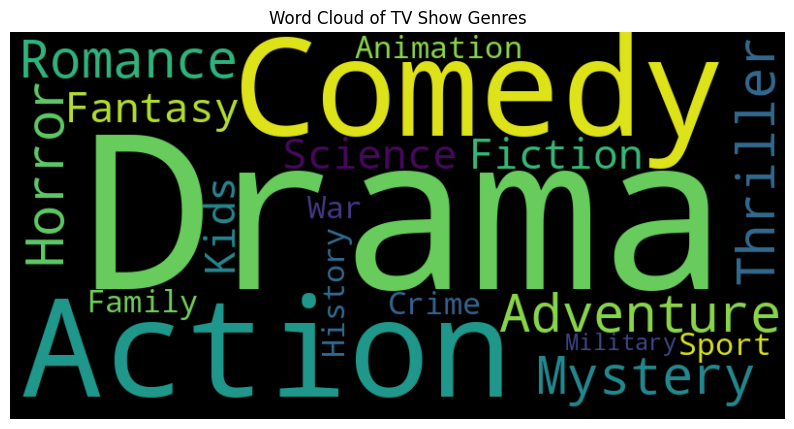

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
genre_list = list(genre_count.keys())
genre_string = ", ".join(genre_list)

wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(genre_string)
# Displaying the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TV Show Genres')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Creating a dataframe of the service_count
service_df = pd.DataFrame({
    "Service": df_copy['Streaming Provider'],
    "IMDB": df_copy['IMDB Rating']
})

# Now let's drop NA values from the dataframe
service_df.dropna(inplace=True)
service_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 133
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Service  54 non-null     object 
 1   IMDB     54 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
# Write Your Code here
# Creating a count for each service in our dataframe
service_count = {}

for service in service_df['Service']:
  service = service.split(",")  # splitting each value in different values to count them separately
  count = 1
  for each_service in service:
    if each_service not in service_count:
      service_count[each_service] = count
    else:
      service_count[each_service] += 1

service_count_df = pd.DataFrame({
    "Service": service_count.keys(),
    "Counts": service_count.values()
})
service_count_df

,Service,Counts
0,Netflix,21
1,Amazon Prime Video,26
2,Hotstar,6
3,aha,1
4,MUBI,1
5,VI movies and tv,2
6,Jio Cinema,9
7,Zee5,3
8,Alt Balaji,2
9,Sony Liv,2


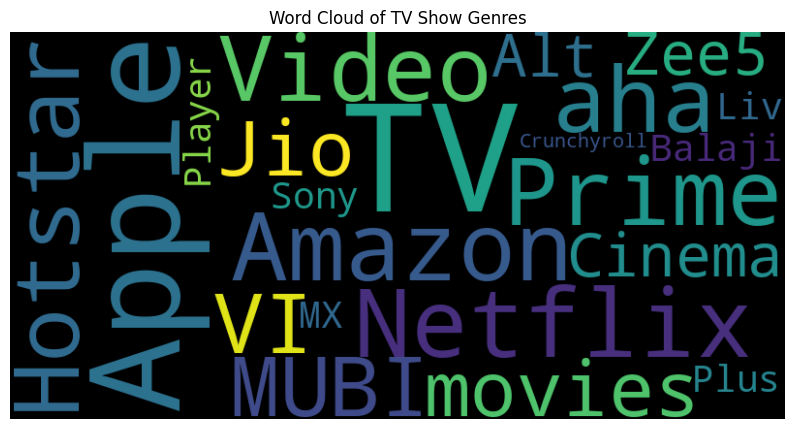

In [ ]:
#Let's Visvalize it using word cloud
service_list = list(service_count.keys())
service_string = ", ".join(service_list)

wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(service_string)
# Displaying the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TV Show Genres')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
# Adding the created dataframes in our final_data file
from openpyxl import load_workbook
file_path = '/content/final_data.xlsx'
workbook = load_workbook(file_path)
sheet_names = ['IMDB_Data', 'Genre_Data', 'Service_Data']

for sheet_name in sheet_names:
    if sheet_name not in workbook.sheetnames:
        workbook.create_sheet(title=sheet_name)
workbook.save(file_path)
dataframes = [imdb_df, genre_count_df, service_count_df]

with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    # Write the DataFrames to the respective sheets
    for sheet_name, df in zip(sheet_names, dataframes):
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/drive/folders/1m-VvZw58HDC8SGoUEaLWtBeTkXvHX507?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***